In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
import os
import shutil
import warnings
warnings.filterwarnings("ignore")
from pathlib import Path
from task_manager import Task,STAGE
from download_data import download_data
import analyze_data
from add_features import JobAddFeatures
from select_feature import JobSelectFeatures
from make_dataset import JobMakeDataset,keep_features
from batch_run_models import JobBatchRunModels
from batch_run_backtests import JobBatchRunBacktests

Loading BokehJS ...

In [2]:
# %load_ext autoreload
# %autoreload 2 # 2 means that modules will be reloaded every time a cell is executed

# Reset Environment

In [20]:
# reset environment
folders = ['features','logs','models','eval_model','eval_strategy']
for folder in folders:
    if Path(folder).exists():
        shutil.rmtree(folder)
    os.mkdir(folder)
    print(f'folder[{folder}] reset')

folder[features] reset
folder[logs] reset
folder[models] reset
folder[eval_model] reset
folder[eval_strategy] reset


In [21]:
for fname in ['tasks_log.json']:
    if Path(fname).exists():
        os.remove(fname)
        print(f'{fname} deleted')

tasks_log.json deleted


# Data Job
## Download data

In [5]:
# re-download data if needed
# download_data(symbol='^GSPC', start_date="2000-01-03", end_date="2023-07-30")

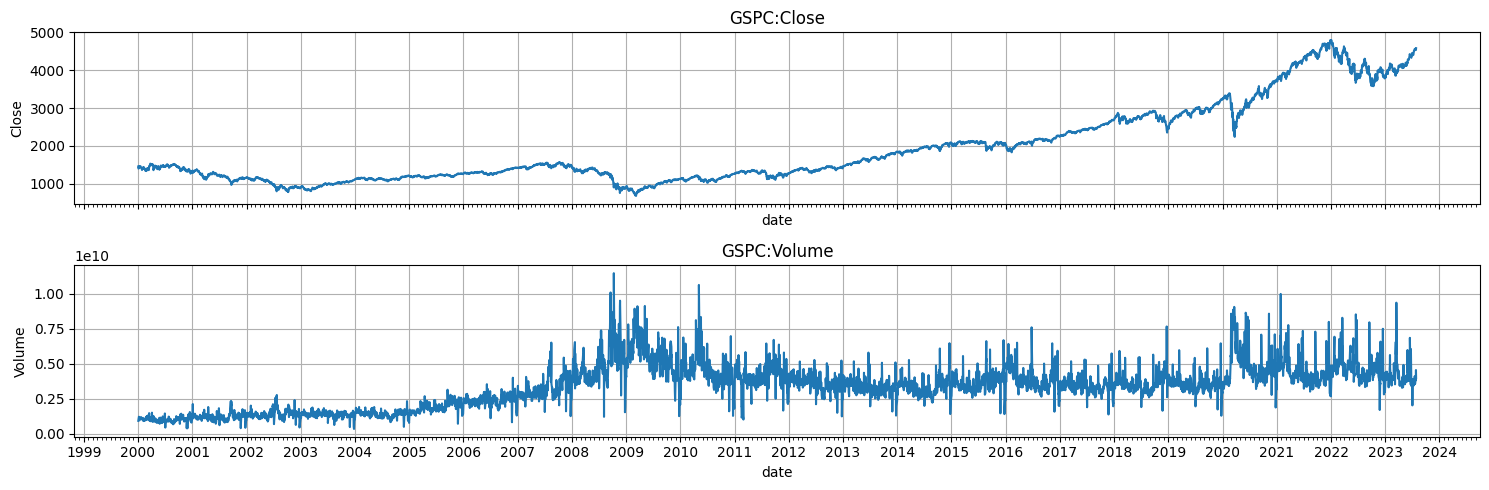

In [6]:
analyze_data.plot_raw_data('GSPC')

## Generate Features

In [7]:
task = Task(
    stage=STAGE.ADD_FEATURE,
    config={"symbol": 'GSPC'},
)
addfeat_taskid = JobAddFeatures(task).main()


************* TASK[19132548] DONE *************
{
    "config": {
        "symbol": "GSPC"
    },
    "description": "add new features for GSPC, shape=(5896, 58)",
    "outputs": {
        "features": [
            "Open",
            "High",
            "Low",
            "Close",
            "Volume",
            "forward_move",
            "forward_change",
            "c-o",
            "h-l",
            "macd",
            "macdsignal",
            "macdhist",
            "is_macd_gold",
            "is_macd_dead",
            "chaikin",
            "obv",
            "return_b1d",
            "return_b5d",
            "return_b5d_std",
            "return_b10d",
            "return_b10d_std",
            "return_b20d",
            "return_b20d_std",
            "vlm_5d_avg",
            "vlm_5d_std",
            "vlm_10d_avg",
            "vlm_10d_std",
            "vlm_20d_avg",
            "vlm_20d_std",
            "price_5d_sma",
            "price_5d_std",
            "pri

## Exploratory Data Analysis
### EDA on categorical features

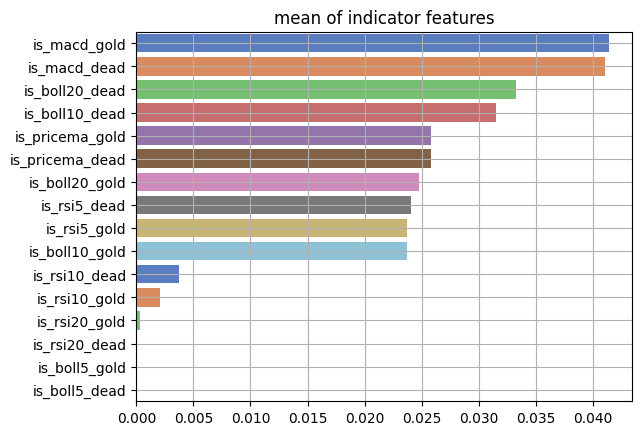

In [8]:
feat_plot = analyze_data.FeaturePlot(task_id=addfeat_taskid)
feat_plot.indicator_mean_bar()

### EDA on numerical features

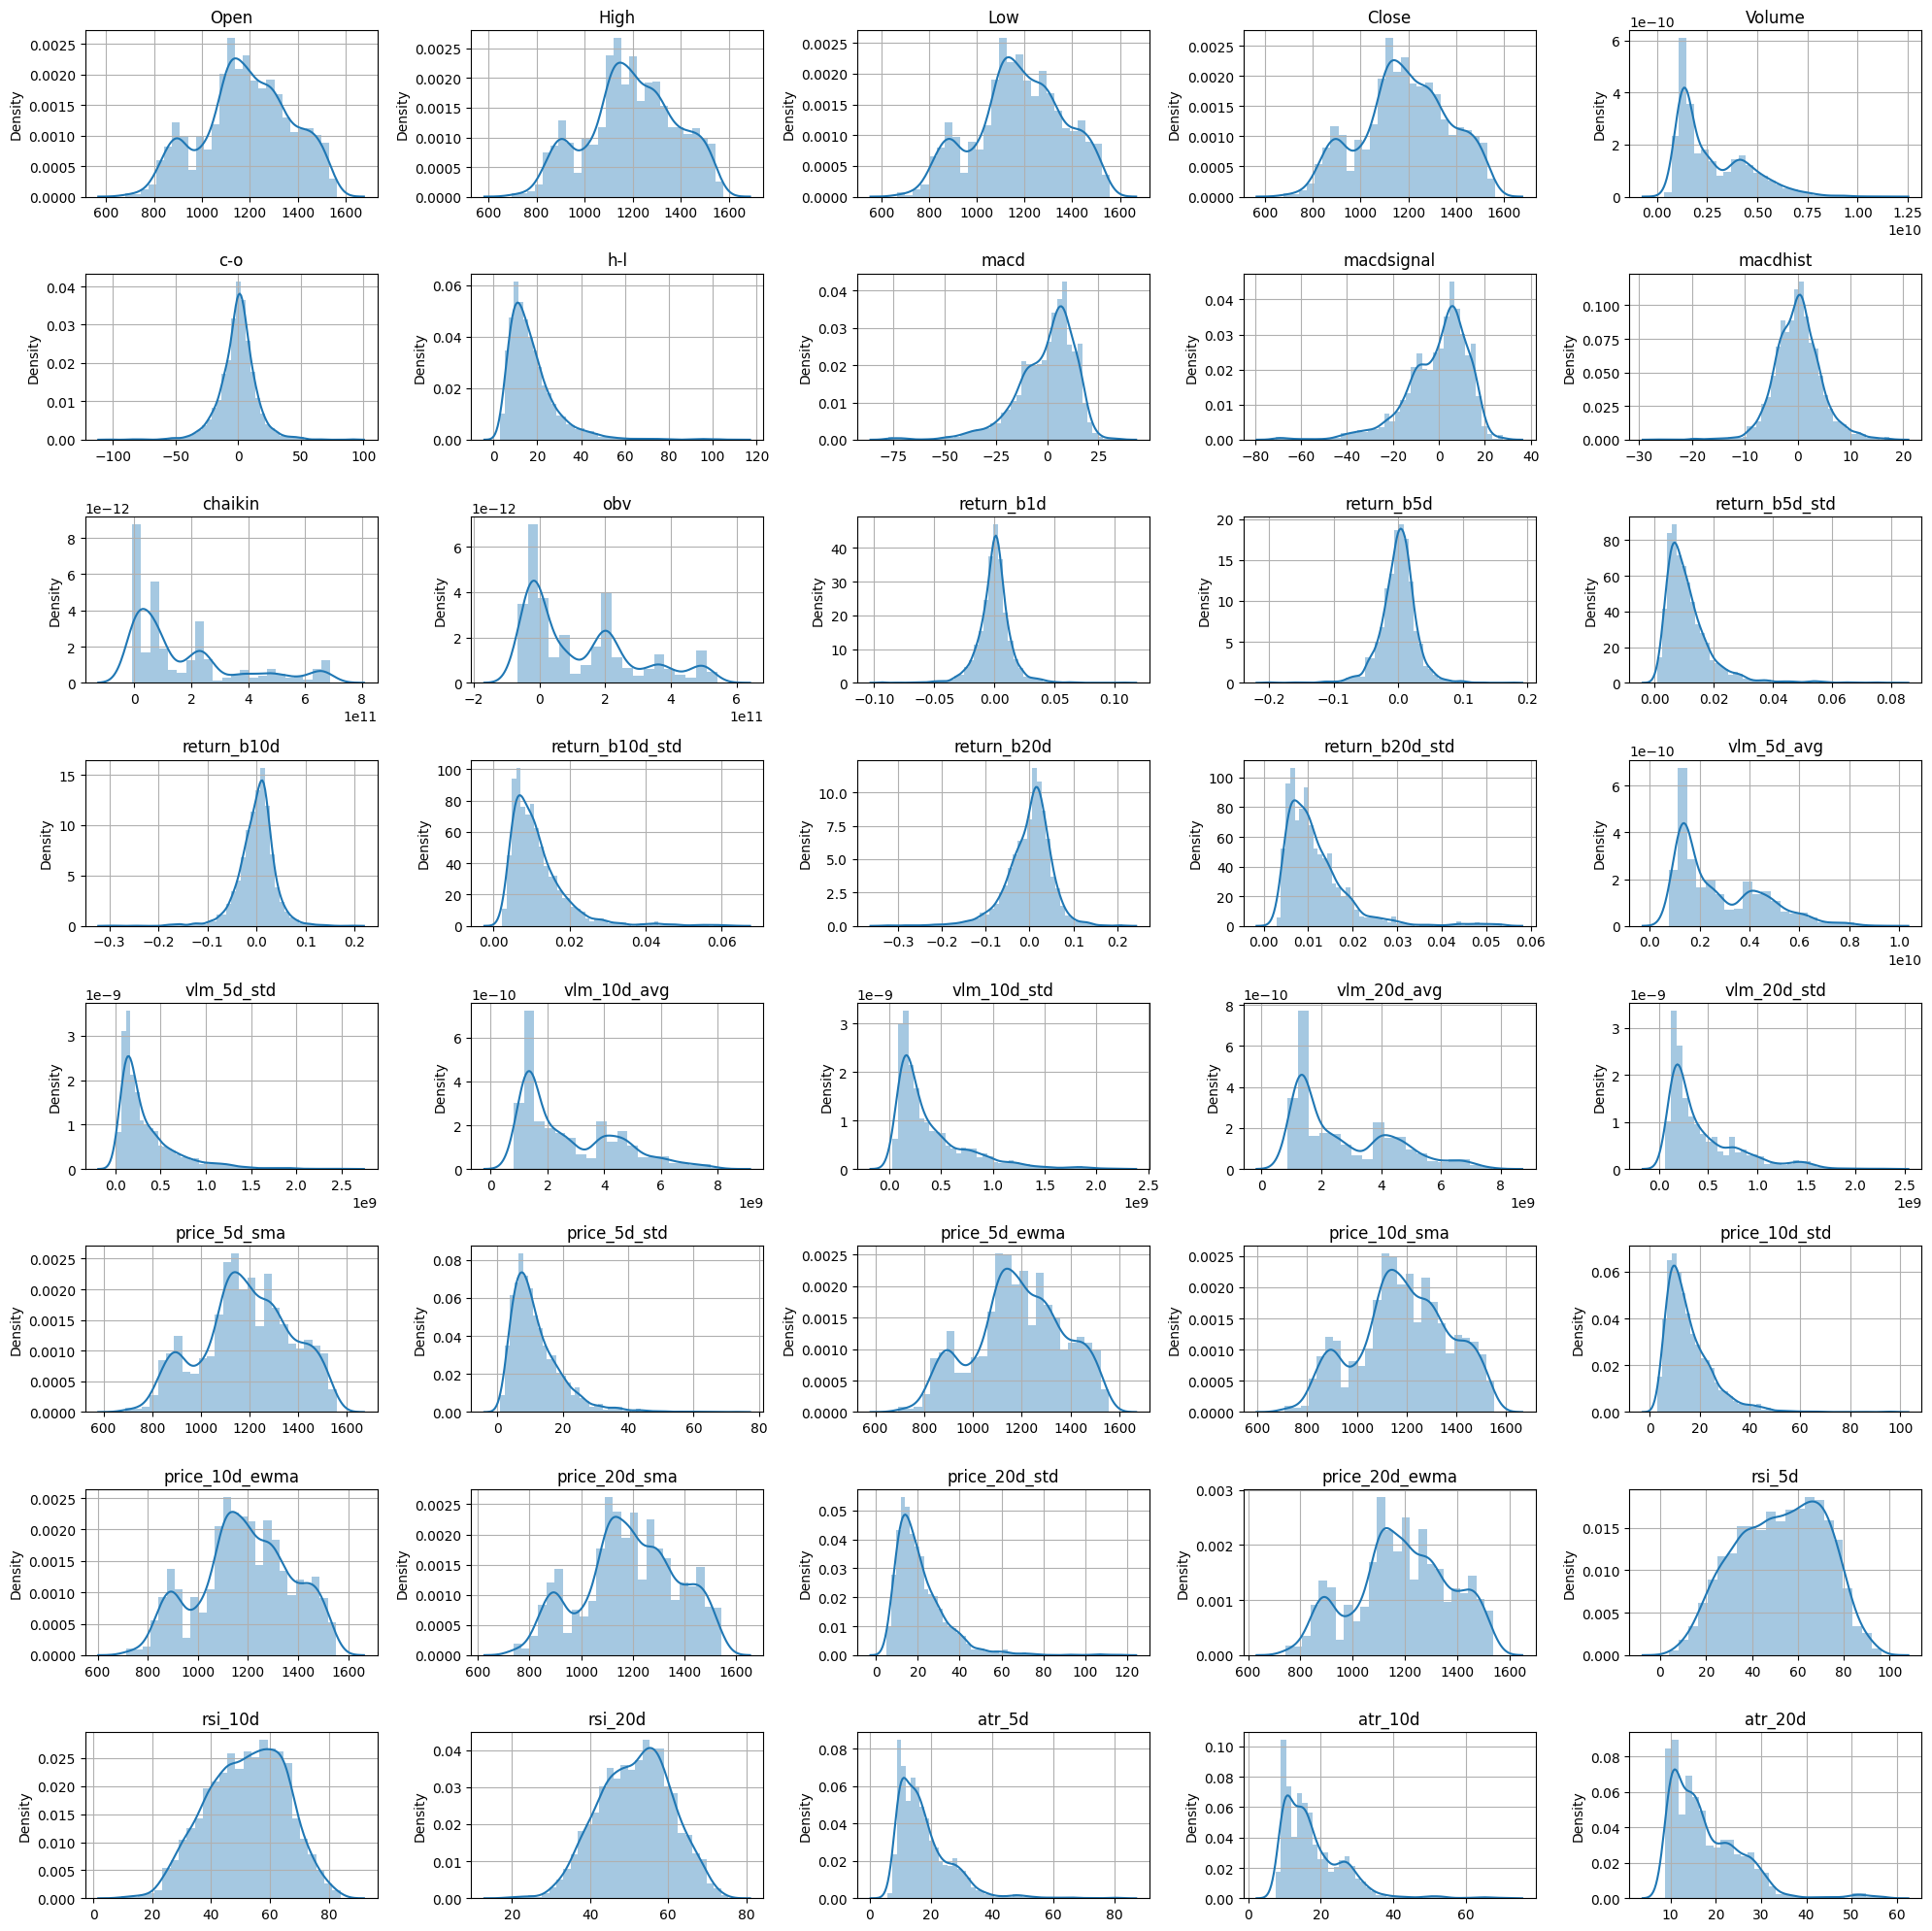

In [9]:
feat_plot.realnum_histogram()

### EDA on correlation

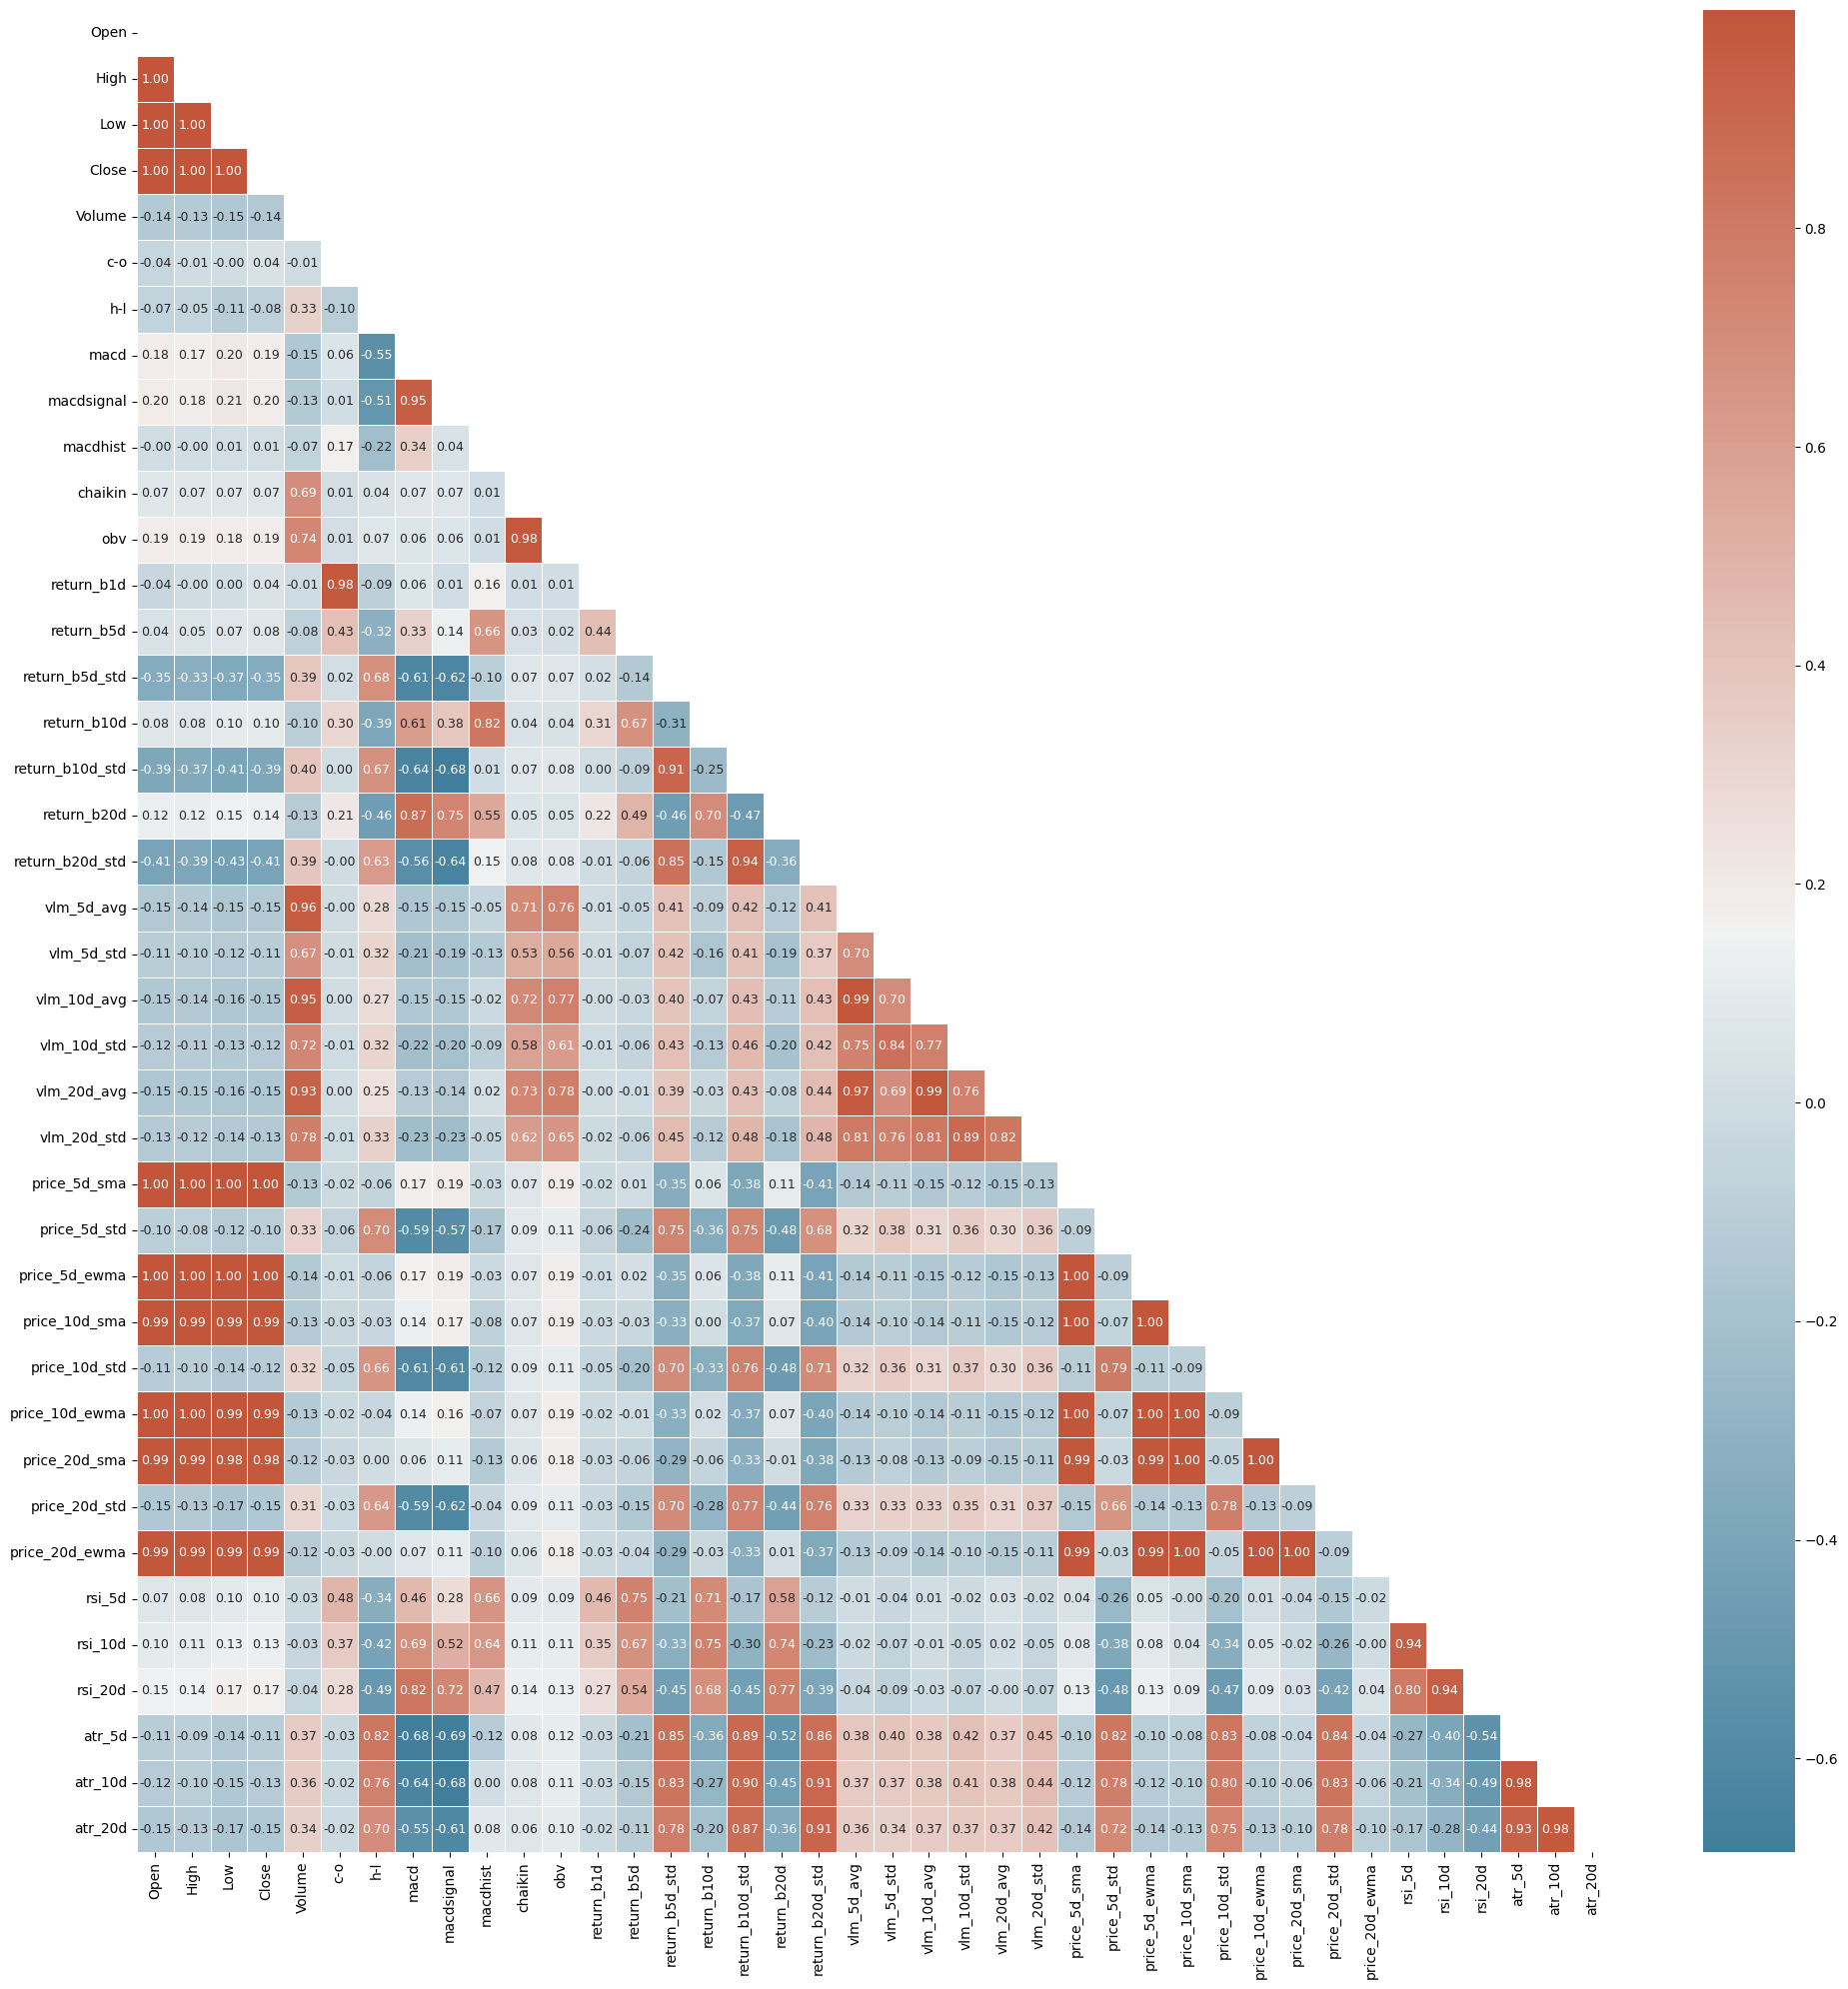

In [10]:
feat_plot.realnum_corr_heatmap()

## Feature Selection

rsi_5d             0.059118
vlm_5d_std         0.045653
return_b5d_std     0.045214
return_b10d        0.041090
macdsignal         0.037294
vlm_10d_std        0.036332
return_b5d         0.035230
price_20d_std      0.035122
c-o                0.034961
price_5d_std       0.034642
vlm_20d_std        0.033674
return_b1d         0.033187
return_b20d_std    0.032576
h-l                0.030783
rsi_20d            0.028287
return_b10d_std    0.027225
Volume             0.027177
vlm_20d_avg        0.026850
rsi_10d            0.026804
atr_10d            0.026126
atr_5d             0.025162
chaikin            0.025033
return_b20d        0.023080
macdhist           0.022784
price_10d_std      0.021598
atr_20d            0.020784
macd               0.020169
obv                0.019804
vlm_10d_avg        0.017859
vlm_5d_avg         0.014093
Open               0.010939
price_5d_sma       0.010061
Close              0.009813
price_5d_ewma      0.009525
High               0.009304
price_10d_sma      0

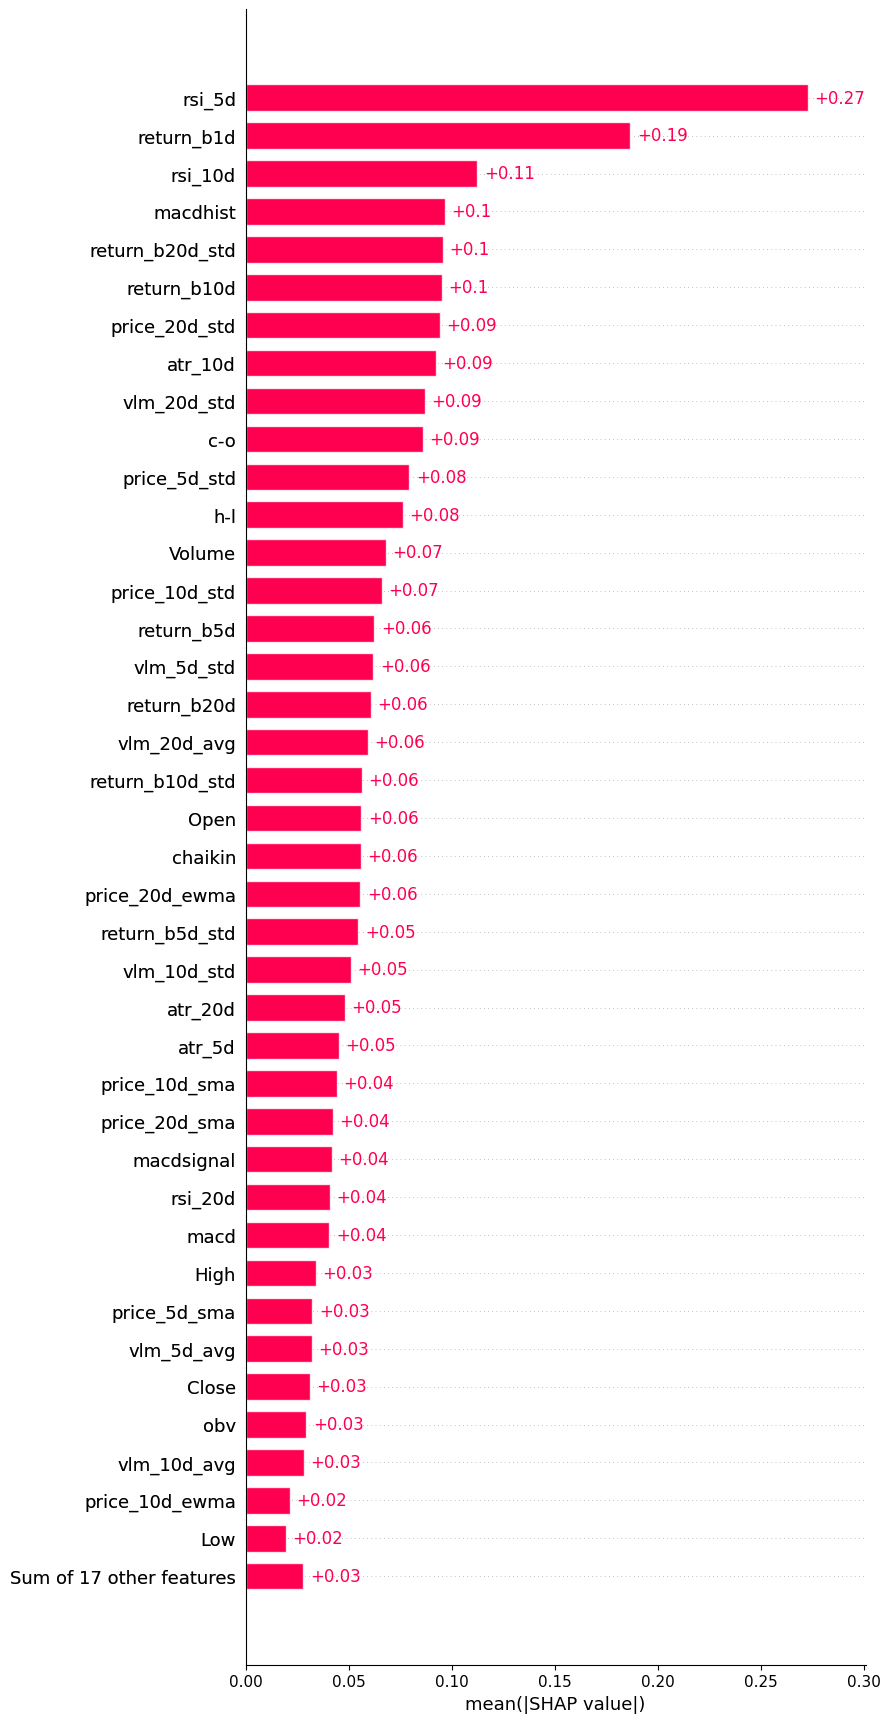

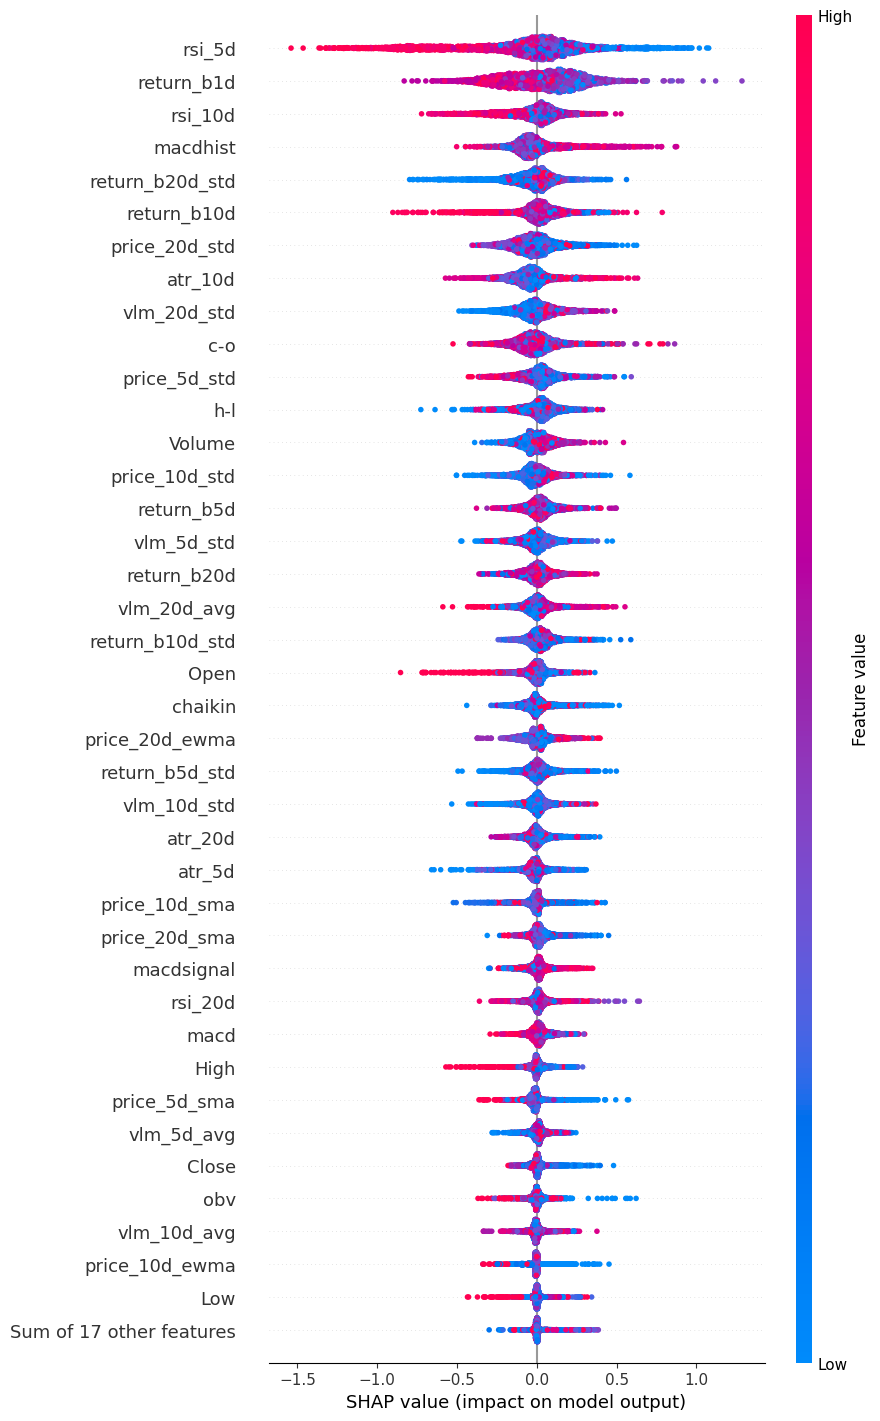


************* TASK[19132554] DONE *************
{
    "config": {
        "splits": [
            7,
            1.5,
            1.5
        ]
    },
    "outputs": {
        "dt_feat_importances": {
            "Close": 0.00981306184414135,
            "High": 0.009303579391547016,
            "Low": 0.005753585330965935,
            "Open": 0.0109389738429999,
            "Volume": 0.027176837877552595,
            "atr_10d": 0.02612565969107271,
            "atr_20d": 0.020783932811733012,
            "atr_5d": 0.02516222215182673,
            "c-o": 0.034961478586312024,
            "chaikin": 0.025032808350202537,
            "h-l": 0.030782911505314803,
            "is_boll10_dead": 0.003423994600077507,
            "is_boll10_gold": 0.0,
            "is_boll20_dead": 0.002170418264021031,
            "is_boll20_gold": 0.0,
            "is_boll5_dead": 0.0,
            "is_boll5_gold": 0.0,
            "is_macd_dead": 0.0020055761171751535,
            "is_macd_gold": 0.0024116

'19132554'

In [11]:
task = Task(
    prev_task=addfeat_taskid,
    stage=STAGE.SELECT_FEATURE,
    config={
        "splits": [7, 1.5, 1.5],
    },
)
job = JobSelectFeatures(task)
job.main()

## Make datasets

In [12]:
task = Task(
    prev_task=addfeat_taskid,
    stage=STAGE.MAKE_DATASET,
    config={
        "keep_features": keep_features(),
        "splits": [2, 1, 1],
        "sample_weight_bins": -1,
        "max_sample_weight": 1,
    },
)
dataset_taskid = JobMakeDataset(task).main()


************* TASK[19132557] DONE *************
{
    "config": {
        "keep_features": {
            "Close": "LOG_SCALING",
            "Volume": "LOG_SCALING",
            "atr_10d": "LOG_SCALING",
            "atr_20d": "LOG_SCALING",
            "atr_5d": "LOG_SCALING",
            "c-o": "SCALING",
            "chaikin": "SCALING",
            "forward_change": "USER_DEFINE",
            "forward_move": "COPY",
            "h-l": "LOG_SCALING",
            "is_boll10_dead": "COPY",
            "is_boll10_gold": "COPY",
            "is_boll20_dead": "COPY",
            "is_boll20_gold": "COPY",
            "is_macd_dead": "COPY",
            "is_macd_gold": "COPY",
            "is_pricema_dead": "COPY",
            "is_pricema_gold": "COPY",
            "is_rsi5_dead": "COPY",
            "is_rsi5_gold": "COPY",
            "macdhist": "SCALING",
            "macdsignal": "SCALING",
            "obv": "SCALING",
            "price_10d_sma": "LOG_SCALING",
            "price_10

# Model Job
## Train Model

In [13]:
JobBatchRunModels(dataset_taskid=dataset_taskid).run_models(seed=4862, overwrite=True)


**************** RUN EXPERIMENT [baseline]
Metal device set to: Apple M1 Pro
[train] '20000218'~'20111104' shape=(2948, 45) positive-rate=0.400


2023-08-19 13:25:59.191245: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-19 13:25:59.191539: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
Epoch 1/100


2023-08-19 13:25:59.594382: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-08-19 13:26:00.158822: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:00.336261: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 23s - loss: 2.5727 - auc: 0.6080

2023-08-19 13:26:00.525899: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 2.2608 - auc: 0.5395

2023-08-19 13:26:01.326021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:01.409317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 44ms/step - loss: 2.2608 - auc: 0.5395 - val_loss: 1.9537 - val_auc: 0.5884
Epoch 2/100
23/23 [==============================] - 1s 23ms/step - loss: 1.7018 - auc: 0.5728 - val_loss: 1.5004 - val_auc: 0.6003
Epoch 3/100
23/23 [==============================] - 1s 23ms/step - loss: 1.3370 - auc: 0.5771 - val_loss: 1.2050 - val_auc: 0.6065
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 1.1009 - auc: 0.5829 - val_loss: 1.0141 - val_auc: 0.6072
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.9486 - auc: 0.5877 - val_loss: 0.8866 - val_auc: 0.6098
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 0.8502 - auc: 0.5865 - val_loss: 0.8042 - val_auc: 0.6103
Epoch 7/100
23/23 [==============================] - 1s 22ms/step - loss: 0.7869 - auc: 0.5843 - val_loss: 0.7509 - val_auc: 0.6077
Epoch 8/100
23/23 [==============================] - 1s 23ms/step - loss: 0.7460 - auc: 

2023-08-19 13:26:13.170660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:13.206482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 5ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 7ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 4ms/step

************* TASK[19132612] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5887206895607298,
            "train": 0.588744021696866,
            "val": 0.6131192174545097
        },
        "score_stddev": {
            "test": 0.04540954530239105,
            "train": 0.048422254621982574,
            "val": 0.03604118898510933
        },
        "test_proba_percentiles": {
            "10p": 0.3082851767539978,
            "20p": 0.3175159692764282,
            "30p": 0.32643410563468933,
            "40p": 0.3349161446094513,
            "50p": 0.34595155715942383,
            "60p": 0.3585229516029358,
            "70p": 0.3756851851940155,
       

2023-08-19 13:26:15.474481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:15.636750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/23 [====>.........................] - ETA: 0s - loss: 0.7012 - auc: 0.4733 

2023-08-19 13:26:15.753181: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 0.6797 - auc: 0.5246

2023-08-19 13:26:16.459117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:16.538083: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 43ms/step - loss: 0.6797 - auc: 0.5246 - val_loss: 0.6493 - val_auc: 0.5793
Epoch 2/100
23/23 [==============================] - 1s 22ms/step - loss: 0.6624 - auc: 0.5875 - val_loss: 0.6492 - val_auc: 0.5790
Epoch 3/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6576 - auc: 0.6032 - val_loss: 0.6456 - val_auc: 0.5835
Epoch 4/100
23/23 [==============================] - 1s 22ms/step - loss: 0.6524 - auc: 0.6175 - val_loss: 0.6489 - val_auc: 0.5621
Epoch 5/100
23/23 [==============================] - 1s 22ms/step - loss: 0.6502 - auc: 0.6266 - val_loss: 0.6486 - val_auc: 0.5704
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6447 - auc: 0.6367 - val_loss: 0.6505 - val_auc: 0.5444
Epoch 7/100
23/23 [==============================] - 1s 22ms/step - loss: 0.6427 - auc: 0.6452 - val_loss: 0.6504 - val_auc: 0.5490
Epoch 8/100
23/23 [==============================] - 1s 22ms/step - loss: 0.6375 - auc: 

2023-08-19 13:26:24.667027: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:24.703329: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 6ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 7ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 6ms/step

************* TASK[19132624] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5721487735882277,
            "train": 0.6230840267516915,
            "val": 0.5840406877661561
        },
        "score_stddev": {
            "test": 0.04075666144490242,
            "train": 0.07662606984376907,
            "val": 0.05186861753463745
        },
        "test_proba_percentiles": {
            "10p": 0.3398807644844055,
            "20p": 0.35213422775268555,
            "30p": 0.3611609935760498,
            "40p": 0.37064725160598755,
            "50p": 0.380190908908844,
            "60p": 0.39100775122642517,
            "70p": 0.40463492274284363,
      

2023-08-19 13:26:27.284366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:27.453138: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 27s - loss: 2.6167 - auc: 0.5395

2023-08-19 13:26:27.591065: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 2.2635 - auc: 0.5314

2023-08-19 13:26:28.477524: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:28.562727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 53ms/step - loss: 2.2635 - auc: 0.5314 - val_loss: 1.9515 - val_auc: 0.5613
Epoch 2/100
23/23 [==============================] - 1s 28ms/step - loss: 1.6985 - auc: 0.5677 - val_loss: 1.5017 - val_auc: 0.5868
Epoch 3/100
23/23 [==============================] - 1s 28ms/step - loss: 1.3324 - auc: 0.5792 - val_loss: 1.2071 - val_auc: 0.6006
Epoch 4/100
23/23 [==============================] - 1s 28ms/step - loss: 1.0968 - auc: 0.5841 - val_loss: 1.0123 - val_auc: 0.6049
Epoch 5/100
23/23 [==============================] - 1s 27ms/step - loss: 0.9456 - auc: 0.5811 - val_loss: 0.8866 - val_auc: 0.6025
Epoch 6/100
23/23 [==============================] - 1s 27ms/step - loss: 0.8483 - auc: 0.5816 - val_loss: 0.8038 - val_auc: 0.6007
Epoch 7/100
23/23 [==============================] - 1s 27ms/step - loss: 0.7846 - auc: 0.5846 - val_loss: 0.7495 - val_auc: 0.6088
Epoch 8/100
23/23 [==============================] - 1s 27ms/step - loss: 0.7443 - auc: 

2023-08-19 13:26:44.117472: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:44.153889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 8ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 10ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 6ms/step

************* TASK[19132643] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5840738140607762,
            "train": 0.586455561390217,
            "val": 0.6105844180534606
        },
        "score_stddev": {
            "test": 0.04187902808189392,
            "train": 0.04586738348007202,
            "val": 0.03506091982126236
        },
        "test_proba_percentiles": {
            "10p": 0.28391048312187195,
            "20p": 0.2937881350517273,
            "30p": 0.3013342618942261,
            "40p": 0.3077737092971802,
            "50p": 0.31657731533050537,
            "60p": 0.32911887764930725,
            "70p": 0.3437829315662384,
      

2023-08-19 13:26:46.611293: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:46.775208: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/23 [====>.........................] - ETA: 0s - loss: 1.8708 - auc: 0.5324 

2023-08-19 13:26:46.920470: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 1.7308 - auc: 0.5540

2023-08-19 13:26:47.719788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:26:47.808664: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 50ms/step - loss: 1.7308 - auc: 0.5540 - val_loss: 1.5793 - val_auc: 0.5277
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 1.4531 - auc: 0.5719 - val_loss: 1.3363 - val_auc: 0.5327
Epoch 3/100
23/23 [==============================] - 1s 25ms/step - loss: 1.2481 - auc: 0.5787 - val_loss: 1.1618 - val_auc: 0.5467
Epoch 4/100
23/23 [==============================] - 1s 23ms/step - loss: 1.0973 - auc: 0.5834 - val_loss: 1.0334 - val_auc: 0.5652
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.9869 - auc: 0.5834 - val_loss: 0.9358 - val_auc: 0.5745
Epoch 6/100
23/23 [==============================] - 1s 23ms/step - loss: 0.9043 - auc: 0.5893 - val_loss: 0.8643 - val_auc: 0.5820
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 0.8440 - auc: 0.5883 - val_loss: 0.8093 - val_auc: 0.5889
Epoch 8/100
23/23 [==============================] - 1s 23ms/step - loss: 0.7990 - auc: 

2023-08-19 13:27:11.351831: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:11.386624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 5ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 7ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 5ms/step

************* TASK[19132711] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5850252168571461,
            "train": 0.5907292557741659,
            "val": 0.6121849757507812
        },
        "score_stddev": {
            "test": 0.05979398265480995,
            "train": 0.05160240828990936,
            "val": 0.0456538125872612
        },
        "test_proba_percentiles": {
            "10p": 0.2592467963695526,
            "20p": 0.27130326628685,
            "30p": 0.2815691828727722,
            "40p": 0.29209765791893005,
            "50p": 0.30306297540664673,
            "60p": 0.3211624324321747,
            "70p": 0.34340381622314453,
         

2023-08-19 13:27:13.693650: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:13.857551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 4/23 [====>.........................] - ETA: 0s - loss: 3.8084 - auc: 0.4976 

2023-08-19 13:27:14.010443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 3.1421 - auc: 0.5434

2023-08-19 13:27:15.064912: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:15.143477: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 62ms/step - loss: 3.1421 - auc: 0.5434 - val_loss: 2.4557 - val_auc: 0.5830
Epoch 2/100
23/23 [==============================] - 1s 24ms/step - loss: 1.9903 - auc: 0.5703 - val_loss: 1.6151 - val_auc: 0.5959
Epoch 3/100
23/23 [==============================] - 1s 24ms/step - loss: 1.3716 - auc: 0.5824 - val_loss: 1.1681 - val_auc: 0.5997
Epoch 4/100
23/23 [==============================] - 1s 24ms/step - loss: 1.0443 - auc: 0.5815 - val_loss: 0.9283 - val_auc: 0.6006
Epoch 5/100
23/23 [==============================] - 1s 23ms/step - loss: 0.8691 - auc: 0.5827 - val_loss: 0.8013 - val_auc: 0.6022
Epoch 6/100
23/23 [==============================] - 1s 24ms/step - loss: 0.7759 - auc: 0.5815 - val_loss: 0.7302 - val_auc: 0.6089
Epoch 7/100
23/23 [==============================] - 1s 24ms/step - loss: 0.7254 - auc: 0.5812 - val_loss: 0.6943 - val_auc: 0.6061
Epoch 8/100
23/23 [==============================] - 1s 23ms/step - loss: 0.6993 - auc: 

2023-08-19 13:27:32.355652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:32.390575: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 6ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 8ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 5ms/step

************* TASK[19132732] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5884898447862338,
            "train": 0.5875077766544833,
            "val": 0.6126911088935704
        },
        "score_stddev": {
            "test": 0.059792663902044296,
            "train": 0.054953865706920624,
            "val": 0.044372495263814926
        },
        "test_proba_percentiles": {
            "10p": 0.2799741327762604,
            "20p": 0.2935408353805542,
            "30p": 0.30416709184646606,
            "40p": 0.31602615118026733,
            "50p": 0.33102095127105713,
            "60p": 0.3489602208137512,
            "70p": 0.37269914150238037,
  

2023-08-19 13:27:35.116350: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:35.383526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:35.439538: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:35.583563: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 32s - loss: 3.5142 - auc: 0.4651

2023-08-19 13:27:35.671924: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 3.0639 - auc: 0.4895

2023-08-19 13:27:36.939892: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:37.065521: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:37.113959: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 3s 79ms/step - loss: 3.0639 - auc: 0.4895 - val_loss: 2.8306 - val_auc: 0.4608
Epoch 2/100
23/23 [==============================] - 1s 34ms/step - loss: 2.3214 - auc: 0.5058 - val_loss: 2.2196 - val_auc: 0.4476
Epoch 3/100
23/23 [==============================] - 1s 34ms/step - loss: 1.8177 - auc: 0.5030 - val_loss: 1.7437 - val_auc: 0.4891
Epoch 4/100
23/23 [==============================] - 1s 37ms/step - loss: 1.4768 - auc: 0.5114 - val_loss: 1.4321 - val_auc: 0.4904
Epoch 5/100
23/23 [==============================] - 1s 33ms/step - loss: 1.2418 - auc: 0.5060 - val_loss: 1.2048 - val_auc: 0.4828
Epoch 6/100
23/23 [==============================] - 1s 34ms/step - loss: 1.0768 - auc: 0.4957 - val_loss: 1.0428 - val_auc: 0.5000
Epoch 7/100
23/23 [==============================] - 1s 35ms/step - loss: 0.9599 - auc: 0.4840 - val_loss: 0.9300 - val_auc: 0.5090
Epoch 8/100
23/23 [==============================] - 1s 35ms/step - loss: 0.8771 - auc: 

2023-08-19 13:27:51.710398: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:51.772376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:51.815334: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 1s 10ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 11ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 7ms/step

************* TASK[19132751] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.52180113700833,
            "train": 0.5093929835134925,
            "val": 0.5321091687096787
        },
        "score_stddev": {
            "test": 0.00017679775191936642,
            "train": 0.00010238560935249552,
            "val": 0.00010839082096936181
        },
        "test_proba_percentiles": {
            "10p": 0.4015541076660156,
            "20p": 0.40161627531051636,
            "30p": 0.401669442653656,
            "40p": 0.4017089307308197,
            "50p": 0.40174904465675354,
            "60p": 0.40178829431533813,
            "70p": 0.4018451869487762

2023-08-19 13:27:54.568642: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:54.739624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 26s - loss: 2.7077 - auc: 0.3425

2023-08-19 13:27:54.896263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 2.3016 - auc: 0.5311

2023-08-19 13:27:55.794799: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:27:55.890665: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 54ms/step - loss: 2.3016 - auc: 0.5311 - val_loss: 1.9850 - val_auc: 0.5497
Epoch 2/100
23/23 [==============================] - 1s 26ms/step - loss: 1.7257 - auc: 0.5736 - val_loss: 1.5193 - val_auc: 0.5685
Epoch 3/100
23/23 [==============================] - 1s 24ms/step - loss: 1.3504 - auc: 0.5851 - val_loss: 1.2173 - val_auc: 0.5848
Epoch 4/100
23/23 [==============================] - 1s 25ms/step - loss: 1.1096 - auc: 0.5878 - val_loss: 1.0179 - val_auc: 0.5922
Epoch 5/100
23/23 [==============================] - 1s 25ms/step - loss: 0.9535 - auc: 0.5874 - val_loss: 0.8899 - val_auc: 0.5941
Epoch 6/100
23/23 [==============================] - 1s 25ms/step - loss: 0.8528 - auc: 0.5916 - val_loss: 0.8051 - val_auc: 0.6037
Epoch 7/100
23/23 [==============================] - 1s 23ms/step - loss: 0.7880 - auc: 0.5886 - val_loss: 0.7520 - val_auc: 0.6003
Epoch 8/100
23/23 [==============================] - 1s 26ms/step - loss: 0.7455 - auc: 

2023-08-19 13:28:14.389026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:28:14.425851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 8ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 7ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 5ms/step

************* TASK[19132814] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5832606237504059,
            "train": 0.5922989248775177,
            "val": 0.6139405288424027
        },
        "score_stddev": {
            "test": 0.06933920085430145,
            "train": 0.06588182598352432,
            "val": 0.05346190556883812
        },
        "test_proba_percentiles": {
            "10p": 0.2753399908542633,
            "20p": 0.2919686436653137,
            "30p": 0.3054868280887604,
            "40p": 0.3211342394351959,
            "50p": 0.3391675651073456,
            "60p": 0.3596765995025635,
            "70p": 0.3885391354560852,
         

2023-08-19 13:28:16.895077: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:28:17.068817: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


 1/23 [>.............................] - ETA: 21s - loss: 2.6486 - auc: 0.5322

2023-08-19 13:28:17.243058: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - ETA: 0s - loss: 2.2980 - auc: 0.5388

2023-08-19 13:28:18.294358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:28:18.389606: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 2s 66ms/step - loss: 2.2980 - auc: 0.5388 - val_loss: 1.9648 - val_auc: 0.5942
Epoch 2/100
23/23 [==============================] - 1s 30ms/step - loss: 1.7270 - auc: 0.5792 - val_loss: 1.5136 - val_auc: 0.5969
Epoch 3/100
23/23 [==============================] - 1s 30ms/step - loss: 1.3542 - auc: 0.5885 - val_loss: 1.2162 - val_auc: 0.6056
Epoch 4/100
23/23 [==============================] - 1s 31ms/step - loss: 1.1127 - auc: 0.5930 - val_loss: 1.0195 - val_auc: 0.6076
Epoch 5/100
23/23 [==============================] - 1s 30ms/step - loss: 0.9560 - auc: 0.5928 - val_loss: 0.8914 - val_auc: 0.6067
Epoch 6/100
23/23 [==============================] - 1s 29ms/step - loss: 0.8548 - auc: 0.5956 - val_loss: 0.8073 - val_auc: 0.6120
Epoch 7/100
23/23 [==============================] - 1s 28ms/step - loss: 0.7893 - auc: 0.5928 - val_loss: 0.7538 - val_auc: 0.6062
Epoch 8/100
23/23 [==============================] - 1s 30ms/step - loss: 0.7474 - auc: 

2023-08-19 13:28:32.193651: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2023-08-19 13:28:32.229549: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


23/23 [==============================] - 0s 9ms/step
[val] '20111107'~'20170915' shape=(1474, 45) positive-rate=0.359
12/12 [==============================] - 0s 10ms/step
[test] '20170918'~'20230727' shape=(1474, 45) positive-rate=0.405
12/12 [==============================] - 0s 7ms/step

************* TASK[19132831] DONE *************
{
    "config": {},
    "outputs": {
        "AUC": {
            "test": 0.5758399358138602,
            "train": 0.5982315885506209,
            "val": 0.6126429570294512
        },
        "score_stddev": {
            "test": 0.04980926960706711,
            "train": 0.05172989144921303,
            "val": 0.039350979030132294
        },
        "test_proba_percentiles": {
            "10p": 0.3034166097640991,
            "20p": 0.3171277642250061,
            "30p": 0.32924211025238037,
            "40p": 0.3419590890407562,
            "50p": 0.3544124960899353,
            "60p": 0.3681619465351105,
            "70p": 0.38610318303108215,
     

## Compare Models

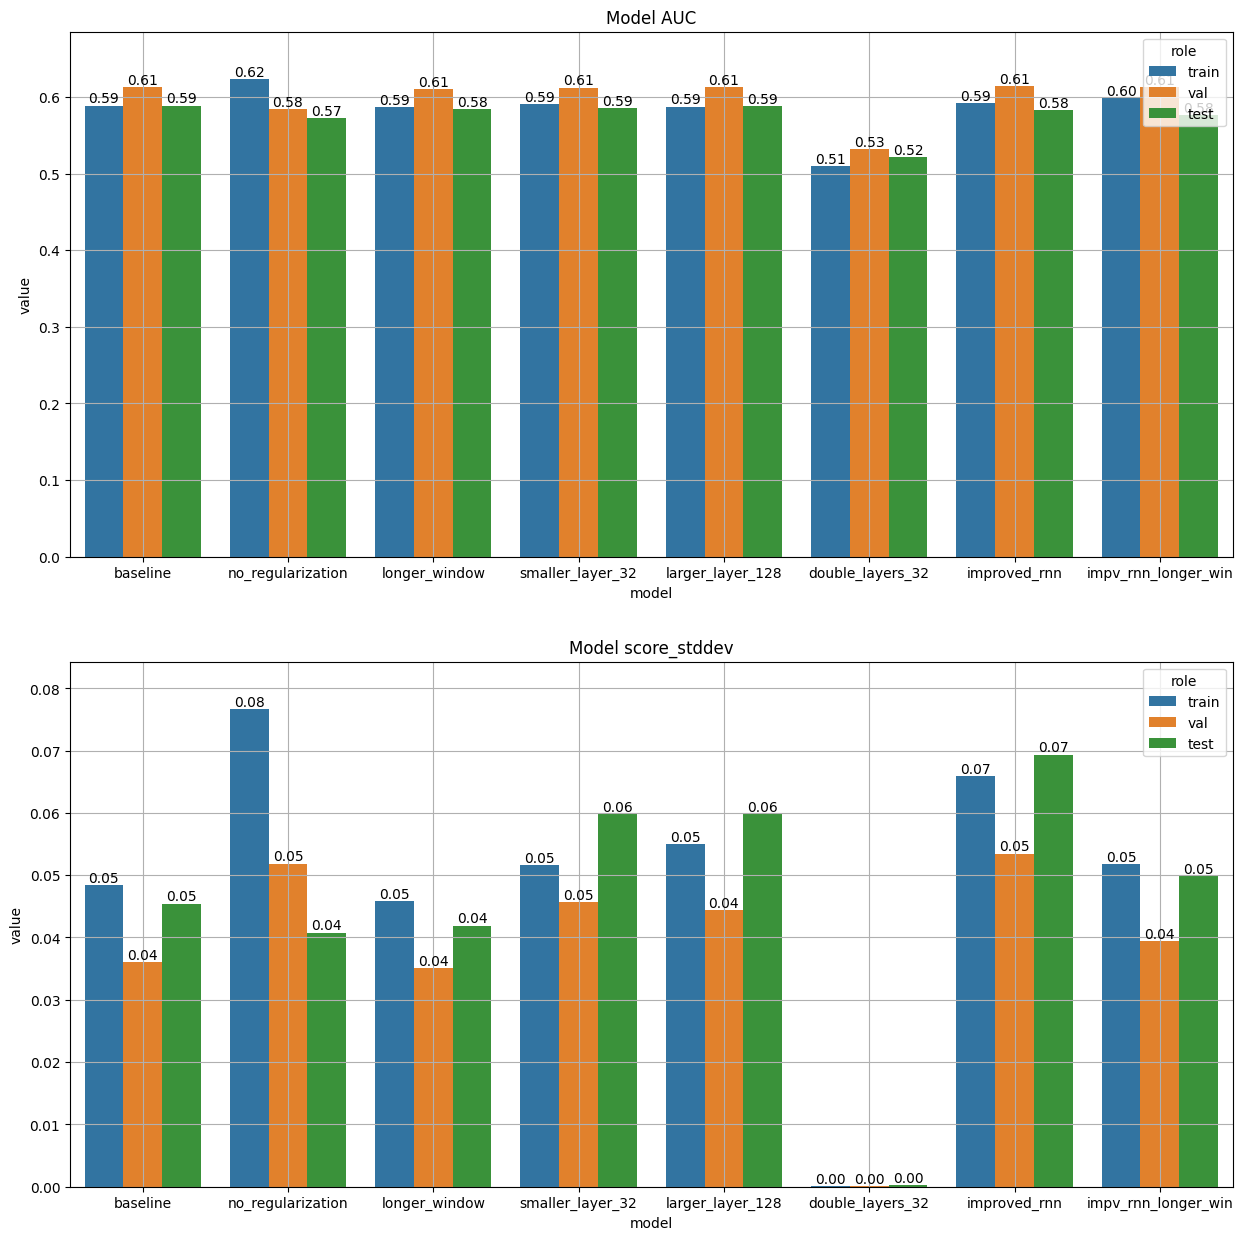

In [14]:
JobBatchRunModels(dataset_taskid=dataset_taskid).compare_models()

In [15]:
models_info = pd.read_csv(f"eval_model/dataset_{dataset_taskid}_models_eval.csv", index_col="config or metric")
models_info

,baseline,no_regularization,longer_window,smaller_layer_32,larger_layer_128,double_layers_32,improved_rnn,impv_rnn_longer_win
config or metric,,,,,,,,
pred_task,19132612,19132624,19132643,19132711,19132732,19132751,19132814,19132831
seq_len,20,20,40,20,20,20,20,40
rnn,64,64,64,32,128,"32,32",64,64
dense,64,64,64,32,128,"32,32",64,64
epochs,100,100,100,100,100,100,100,100
earlystop_patience,10,10,10,10,10,10,10,10
l2,0.01,0,0.01,0.01,0.01,0.01,0.01,0.01
feature_group,feature has 33 window feats,feature has 33 window feats,feature has 33 window feats,feature has 33 window feats,feature has 33 window feats,feature has 33 window feats,"realnum has 33 window feats, indicator has 10 ...","realnum has 33 window feats, indicator has 10 ..."
rand_seed,4862,4862,4862,4862,4862,4862,4862,4862


In [16]:
selected_model_taskid = models_info.loc['pred_task','improved_rnn']
selected_model_taskid

'19132814'

# Strategy Job
## Select threshold

{
    "AUC": {
        "train": 0.5922989248775177,
        "val": 0.6139405288424027,
        "test": 0.5832606237504059
    },
    "score_stddev": {
        "train": 0.06588182598352432,
        "val": 0.05346190556883812,
        "test": 0.06933920085430145
    },
    "train_proba_percentiles": {
        "10p": 0.31563064455986023,
        "20p": 0.33636537194252014,
        "30p": 0.3566572368144989,
        "40p": 0.3766311705112457,
        "50p": 0.3935028910636902,
        "60p": 0.41213566064834595,
        "70p": 0.4341493248939514,
        "80p": 0.4613805115222931,
        "90p": 0.5007151961326599
    },
    "val_proba_percentiles": {
        "10p": 0.3054019510746002,
        "20p": 0.3216113746166229,
        "30p": 0.33424484729766846,
        "40p": 0.34575197100639343,
        "50p": 0.36043092608451843,
        "60p": 0.3725711405277252,
        "70p": 0.38749346137046814,
        "80p": 0.4100700318813324,
        "90p": 0.44444888830184937
    },
    "test_proba_pe

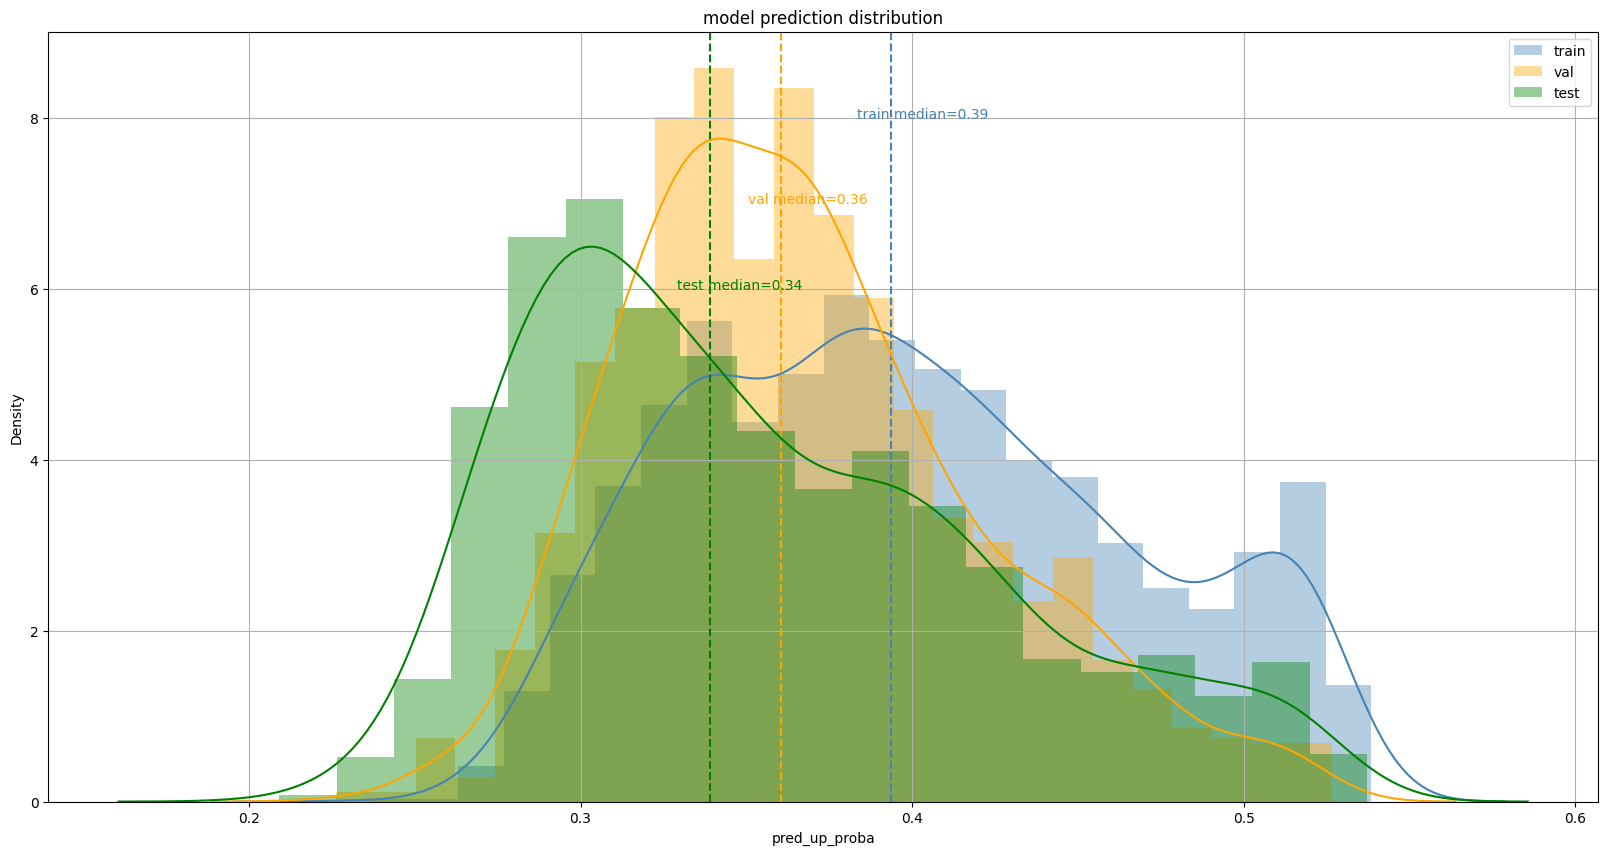

In [17]:
job_batch_backtests = JobBatchRunBacktests(pred_taskid=selected_model_taskid)
job_batch_backtests.disp_pred_distribution()

## Run backtests

In [18]:
thresholds = {"val": [0.33, 0.37], "test": [0.32, 0.35]}
job_batch_backtests.run_backtests(thresholds=thresholds, overwrite=True)

Start                     2011-12-05 00:00:00
End                       2017-09-15 00:00:00
Duration                   2111 days 00:00:00
Exposure Time [%]                   99.862543
Equity Final [$]               1986219.432861
Equity Peak [$]                1986219.432861
Return [%]                          98.621943
Buy & Hold Return [%]               98.891882
Return (Ann.) [%]                   12.620405
Volatility (Ann.) [%]               13.997167
Sharpe Ratio                          0.90164
Sortino Ratio                        1.470841
Calmar Ratio                         0.891771
Max. Drawdown [%]                  -14.152078
Avg. Drawdown [%]                    -1.38448
Max. Drawdown Duration      417 days 00:00:00
Avg. Drawdown Duration       18 days 00:00:00
# Trades                                 1453
Win Rate [%]                        55.746731
Best Trade [%]                       3.738888
Worst Trade [%]                     -3.439479
Avg. Trade [%]                    


************* TASK[19132834] DONE *************
{
    "config": {
        "commission": 0.0,
        "init_cash": 1000000,
        "pos_class": "SellBuyEveryday",
        "role": "val",
        "sig_class": "DummySignal"
    },
    "outputs": {
        "performance": {
            "# Trades": 1453,
            "Avg. Drawdown Duration": "18 days 00:00:00",
            "Avg. Drawdown [%]": -1.3844795137053747,
            "Avg. Trade Duration": "2 days 00:00:00",
            "Avg. Trade [%]": 0.047149635515486565,
            "Best Trade [%]": 3.738887706914973,
            "Buy & Hold Return [%]": 98.891881811214,
            "Calmar Ratio": 0.8917705097941634,
            "Duration": "2111 days 00:00:00",
            "End": "2017-09-15 00:00:00",
            "Equity Final [$]": 1986219.4328613281,
            "Equity Peak [$]": 1986219.4328613281,
            "Expectancy [%]": 0.0498631463419606,
            "Exposure Time [%]": 99.86254295532646,
            "Max. Drawdown Duration":


************* TASK[19132836] DONE *************
{
    "config": {
        "commission": 0.0,
        "init_cash": 1000000,
        "pos_class": "SellBuyEveryday",
        "role": "test",
        "sig_class": "DummySignal"
    },
    "outputs": {
        "performance": {
            "# Trades": 1453,
            "Avg. Drawdown Duration": "23 days 00:00:00",
            "Avg. Drawdown [%]": -2.10255199824966,
            "Avg. Trade Duration": "2 days 00:00:00",
            "Avg. Trade [%]": 0.040391966259423207,
            "Best Trade [%]": 6.220033170353867,
            "Buy & Hold Return [%]": 77.71673234023575,
            "Calmar Ratio": 0.30779424150879064,
            "Duration": "2113 days 00:00:00",
            "End": "2023-07-27 00:00:00",
            "Equity Final [$]": 1774273.931640625,
            "Equity Peak [$]": 1875601.5434570312,
            "Expectancy [%]": 0.04648845818324771,
            "Exposure Time [%]": 99.86254295532646,
            "Max. Drawdown Duration


************* TASK[19132837] DONE *************
{
    "config": {
        "commission": 0.002,
        "init_cash": 1000000,
        "pos_class": "SimplePosition",
        "role": "val",
        "sig_class": "SmaSignal"
    },
    "outputs": {
        "performance": {
            "# Trades": 74,
            "Avg. Drawdown Duration": "141 days 00:00:00",
            "Avg. Drawdown [%]": -5.310928635438622,
            "Avg. Trade Duration": "27 days 00:00:00",
            "Avg. Trade [%]": -0.7585916173616924,
            "Best Trade [%]": 6.977819486328385,
            "Buy & Hold Return [%]": 98.891881811214,
            "Calmar Ratio": 0.0,
            "Duration": "2111 days 00:00:00",
            "End": "2017-09-15 00:00:00",
            "Equity Final [$]": 569449.2171914061,
            "Equity Peak [$]": 1099523.1983601074,
            "Expectancy [%]": -0.7232075316070768,
            "Exposure Time [%]": 94.02061855670102,
            "Max. Drawdown Duration": "1578 days 00:00:


************* TASK[19132839] DONE *************
{
    "config": {
        "commission": 0.002,
        "init_cash": 1000000,
        "pos_class": "SimplePosition",
        "role": "test",
        "sig_class": "SmaSignal"
    },
    "outputs": {
        "performance": {
            "# Trades": 60,
            "Avg. Drawdown Duration": "1995 days 00:00:00",
            "Avg. Drawdown [%]": -34.646267687448365,
            "Avg. Trade Duration": "34 days 00:00:00",
            "Avg. Trade [%]": -0.24013516488654574,
            "Best Trade [%]": 13.493277567651308,
            "Buy & Hold Return [%]": 77.71673234023575,
            "Calmar Ratio": 0.0,
            "Duration": "2113 days 00:00:00",
            "End": "2023-07-27 00:00:00",
            "Equity Final [$]": 866064.8530708003,
            "Equity Peak [$]": 1036792.716175293,
            "Expectancy [%]": -0.12278016053319167,
            "Exposure Time [%]": 94.50171821305841,
            "Max. Drawdown Duration": "1995 days


************* TASK[19132840] DONE *************
{
    "config": {
        "adjust_size_by_proba": false,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.33,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "SimplePosition",
        "risk_ratio": 0.03,
        "role": "val",
        "sig_class": "ModelSignal",
        "stop_loss": false,
        "take_profit": false,
        "up_threshold": 0.37
    },
    "outputs": {
        "performance": {
            "# Trades": 118,
            "Avg. Drawdown Duration": "20 days 00:00:00",
            "Avg. Drawdown [%]": -1.6815105311532579,
            "Avg. Trade Duration": "18 days 00:00:00",
            "Avg. Trade [%]": 0.6868115810567232,
            "Best Trade [%]": 6.636515596244674,
            "Buy & Hold Return [%]": 98.891881811214,
            "Calmar Ratio": 1.153425689275885,
            "Duration": "2111 days 00:00:00",
            "End": "2017-09-15 00:00:00",
     


************* TASK[19132842] DONE *************
{
    "config": {
        "adjust_size_by_proba": false,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.33,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "AtrPosition",
        "risk_ratio": 0.03,
        "role": "val",
        "sig_class": "ModelSignal",
        "stop_loss": false,
        "take_profit": false,
        "up_threshold": 0.37
    },
    "outputs": {
        "performance": {
            "# Trades": 103,
            "Avg. Drawdown Duration": "18 days 00:00:00",
            "Avg. Drawdown [%]": -1.2239965080927477,
            "Avg. Trade Duration": "21 days 00:00:00",
            "Avg. Trade [%]": 0.962393305552367,
            "Best Trade [%]": 9.107005482854857,
            "Buy & Hold Return [%]": 98.891881811214,
            "Calmar Ratio": 1.0993778373182361,
            "Duration": "2111 days 00:00:00",
            "End": "2017-09-15 00:00:00",
        


************* TASK[19132843] DONE *************
{
    "config": {
        "adjust_size_by_proba": true,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.33,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "AtrPosition",
        "risk_ratio": 0.03,
        "role": "val",
        "sig_class": "ModelSignal",
        "signal_strength_scale": 0.9,
        "stop_loss": false,
        "take_profit": false,
        "up_threshold": 0.37
    },
    "outputs": {
        "performance": {
            "# Trades": 106,
            "Avg. Drawdown Duration": "20 days 00:00:00",
            "Avg. Drawdown [%]": -1.2812450458449545,
            "Avg. Trade Duration": "20 days 00:00:00",
            "Avg. Trade [%]": 0.7590295700275362,
            "Best Trade [%]": 6.636515596244674,
            "Buy & Hold Return [%]": 98.891881811214,
            "Calmar Ratio": 0.8804628179999111,
            "Duration": "2111 days 00:00:00",
            


************* TASK[19132845] DONE *************
{
    "config": {
        "adjust_size_by_proba": true,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.33,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "AtrPosition",
        "risk_ratio": 0.03,
        "role": "val",
        "sig_class": "ModelSignal",
        "signal_strength_scale": 0.9,
        "stop_loss": true,
        "take_profit": true,
        "up_threshold": 0.37
    },
    "outputs": {
        "performance": {
            "# Trades": 159,
            "Avg. Drawdown Duration": "29 days 00:00:00",
            "Avg. Drawdown [%]": -1.4944605817202605,
            "Avg. Trade Duration": "12 days 00:00:00",
            "Avg. Trade [%]": 0.38767191884949703,
            "Best Trade [%]": 5.120688590267686,
            "Buy & Hold Return [%]": 98.891881811214,
            "Calmar Ratio": 0.5455714751513437,
            "Duration": "2111 days 00:00:00",
            "


************* TASK[19132846] DONE *************
{
    "config": {
        "adjust_size_by_proba": false,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.32,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "SimplePosition",
        "risk_ratio": 0.03,
        "role": "test",
        "sig_class": "ModelSignal",
        "stop_loss": false,
        "take_profit": false,
        "up_threshold": 0.35
    },
    "outputs": {
        "performance": {
            "# Trades": 155,
            "Avg. Drawdown Duration": "47 days 00:00:00",
            "Avg. Drawdown [%]": -3.894958328481996,
            "Avg. Trade Duration": "14 days 00:00:00",
            "Avg. Trade [%]": 0.29335094417934915,
            "Best Trade [%]": 4.215255281098118,
            "Buy & Hold Return [%]": 77.71673234023575,
            "Calmar Ratio": 0.2614850656943893,
            "Duration": "2113 days 00:00:00",
            "End": "2023-07-27 00:00:00",
 


************* TASK[19132847] DONE *************
{
    "config": {
        "adjust_size_by_proba": false,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.32,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "AtrPosition",
        "risk_ratio": 0.03,
        "role": "test",
        "sig_class": "ModelSignal",
        "stop_loss": false,
        "take_profit": false,
        "up_threshold": 0.35
    },
    "outputs": {
        "performance": {
            "# Trades": 187,
            "Avg. Drawdown Duration": "26 days 00:00:00",
            "Avg. Drawdown [%]": -2.4028719491442816,
            "Avg. Trade Duration": "14 days 00:00:00",
            "Avg. Trade [%]": 0.5594881837236887,
            "Best Trade [%]": 11.5103225315621,
            "Buy & Hold Return [%]": 77.71673234023575,
            "Calmar Ratio": 0.37024209909515604,
            "Duration": "2113 days 00:00:00",
            "End": "2023-07-27 00:00:00",
    


************* TASK[19132849] DONE *************
{
    "config": {
        "adjust_size_by_proba": true,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.32,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "AtrPosition",
        "risk_ratio": 0.03,
        "role": "test",
        "sig_class": "ModelSignal",
        "signal_strength_scale": 0.9,
        "stop_loss": false,
        "take_profit": false,
        "up_threshold": 0.35
    },
    "outputs": {
        "performance": {
            "# Trades": 191,
            "Avg. Drawdown Duration": "24 days 00:00:00",
            "Avg. Drawdown [%]": -2.0295780960706855,
            "Avg. Trade Duration": "14 days 00:00:00",
            "Avg. Trade [%]": 0.6170365360221419,
            "Best Trade [%]": 24.262462822722284,
            "Buy & Hold Return [%]": 77.71673234023575,
            "Calmar Ratio": 0.4038983110208208,
            "Duration": "2113 days 00:00:00",
        


************* TASK[19132850] DONE *************
{
    "config": {
        "adjust_size_by_proba": true,
        "allow_scale_in": true,
        "commission": 0.002,
        "down_threshold": 0.32,
        "init_cash": 1000000,
        "n_atr": 3,
        "pos_class": "AtrPosition",
        "risk_ratio": 0.03,
        "role": "test",
        "sig_class": "ModelSignal",
        "signal_strength_scale": 0.9,
        "stop_loss": true,
        "take_profit": true,
        "up_threshold": 0.35
    },
    "outputs": {
        "performance": {
            "# Trades": 178,
            "Avg. Drawdown Duration": "169 days 00:00:00",
            "Avg. Drawdown [%]": -8.290363882900113,
            "Avg. Trade Duration": "9 days 00:00:00",
            "Avg. Trade [%]": 0.14243009807144436,
            "Best Trade [%]": 20.986381659074958,
            "Buy & Hold Return [%]": 77.71673234023575,
            "Calmar Ratio": 0.015556080398550201,
            "Duration": "2113 days 00:00:00",
        

## Compare strategies

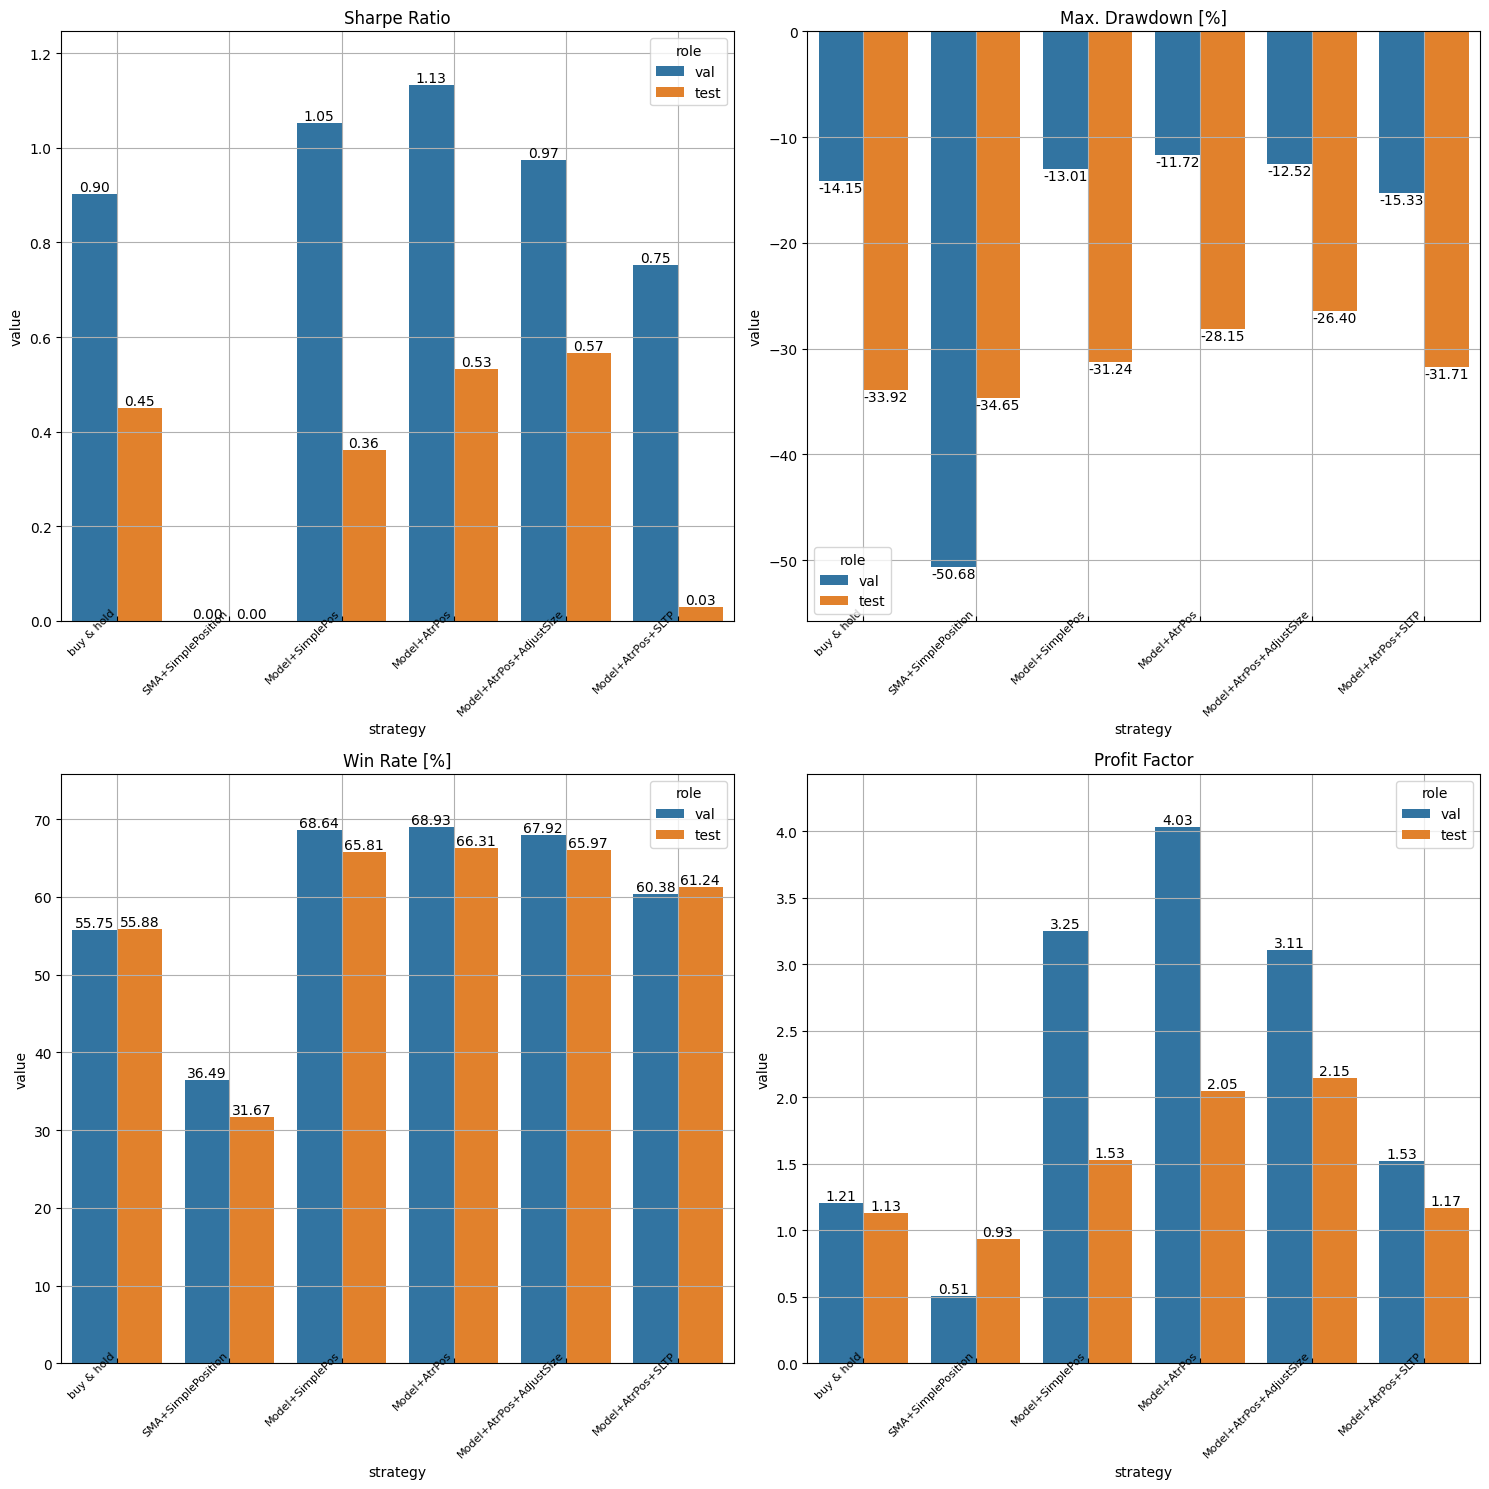

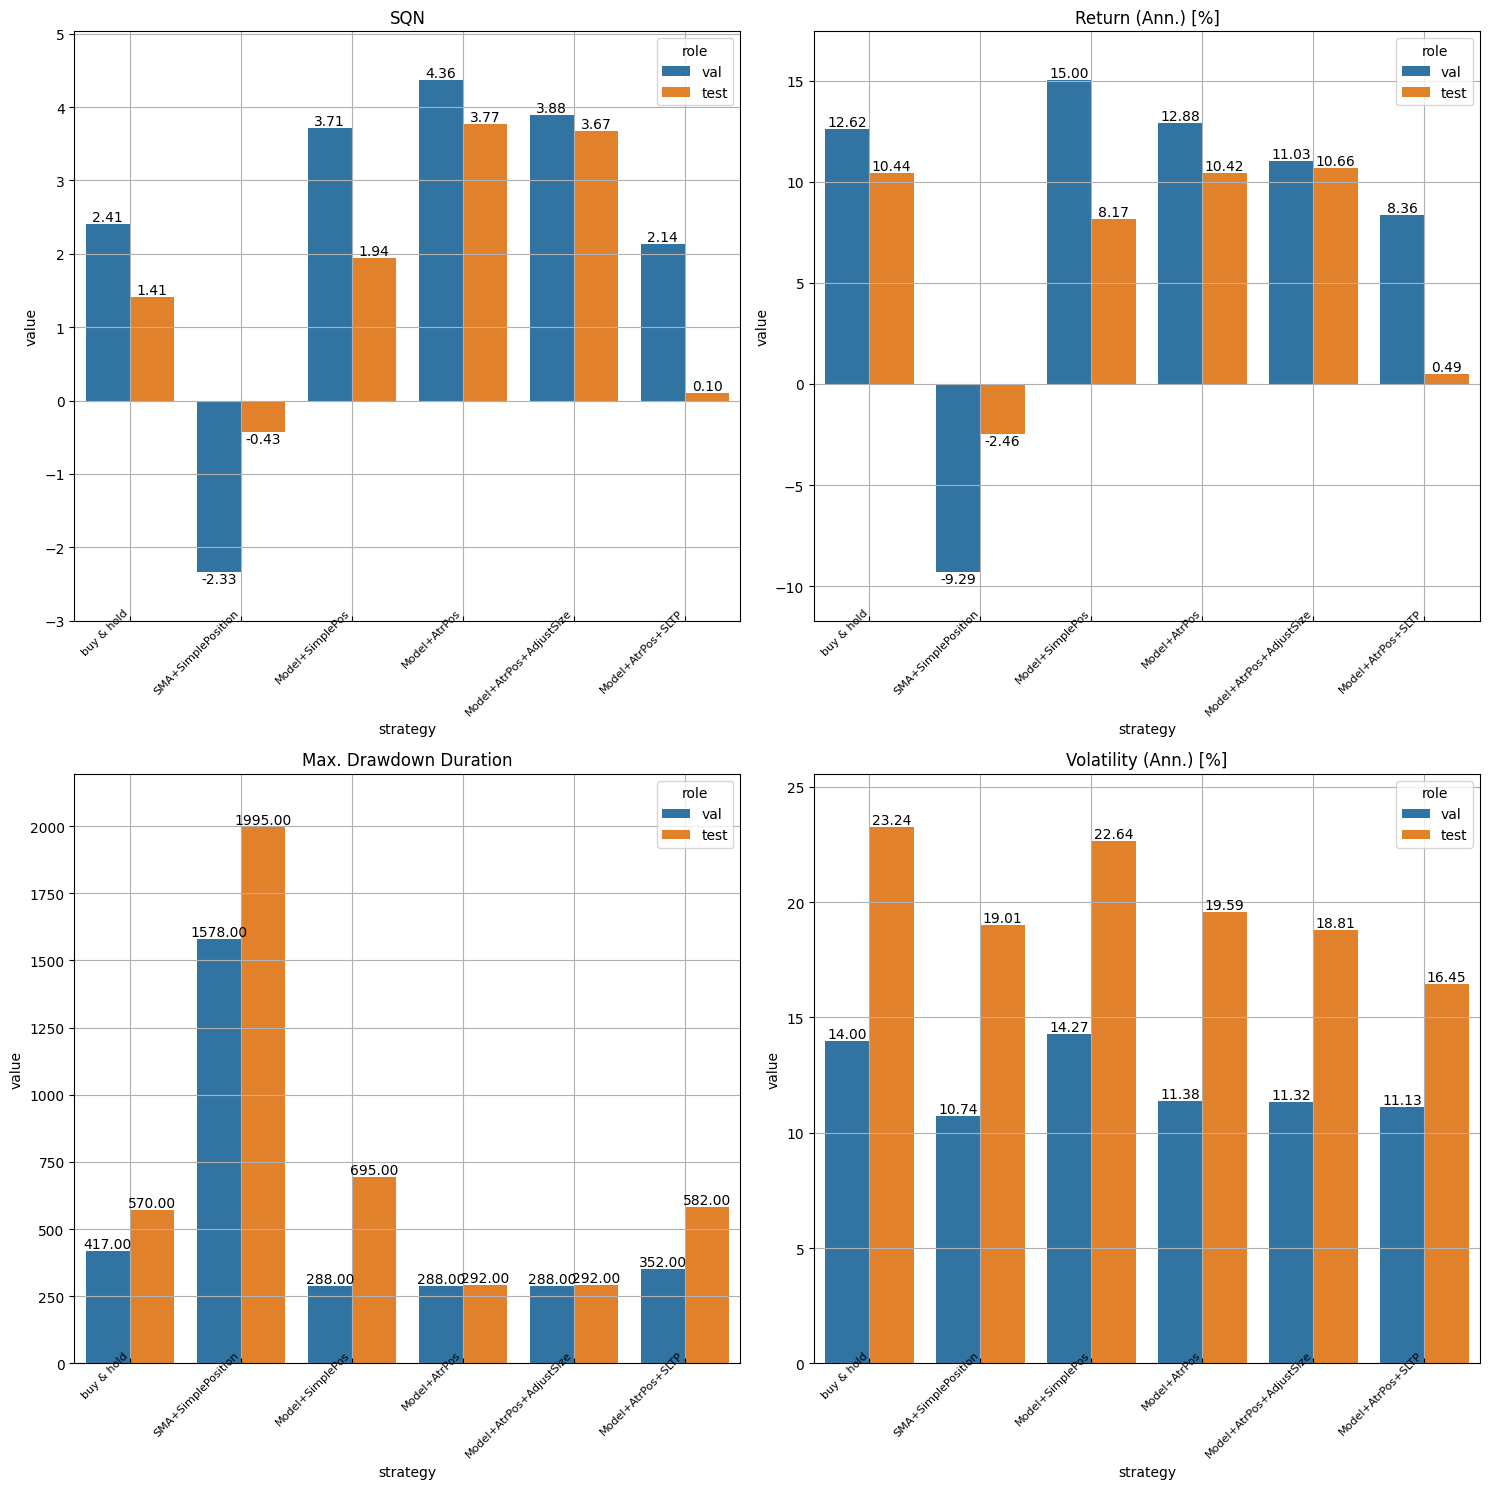

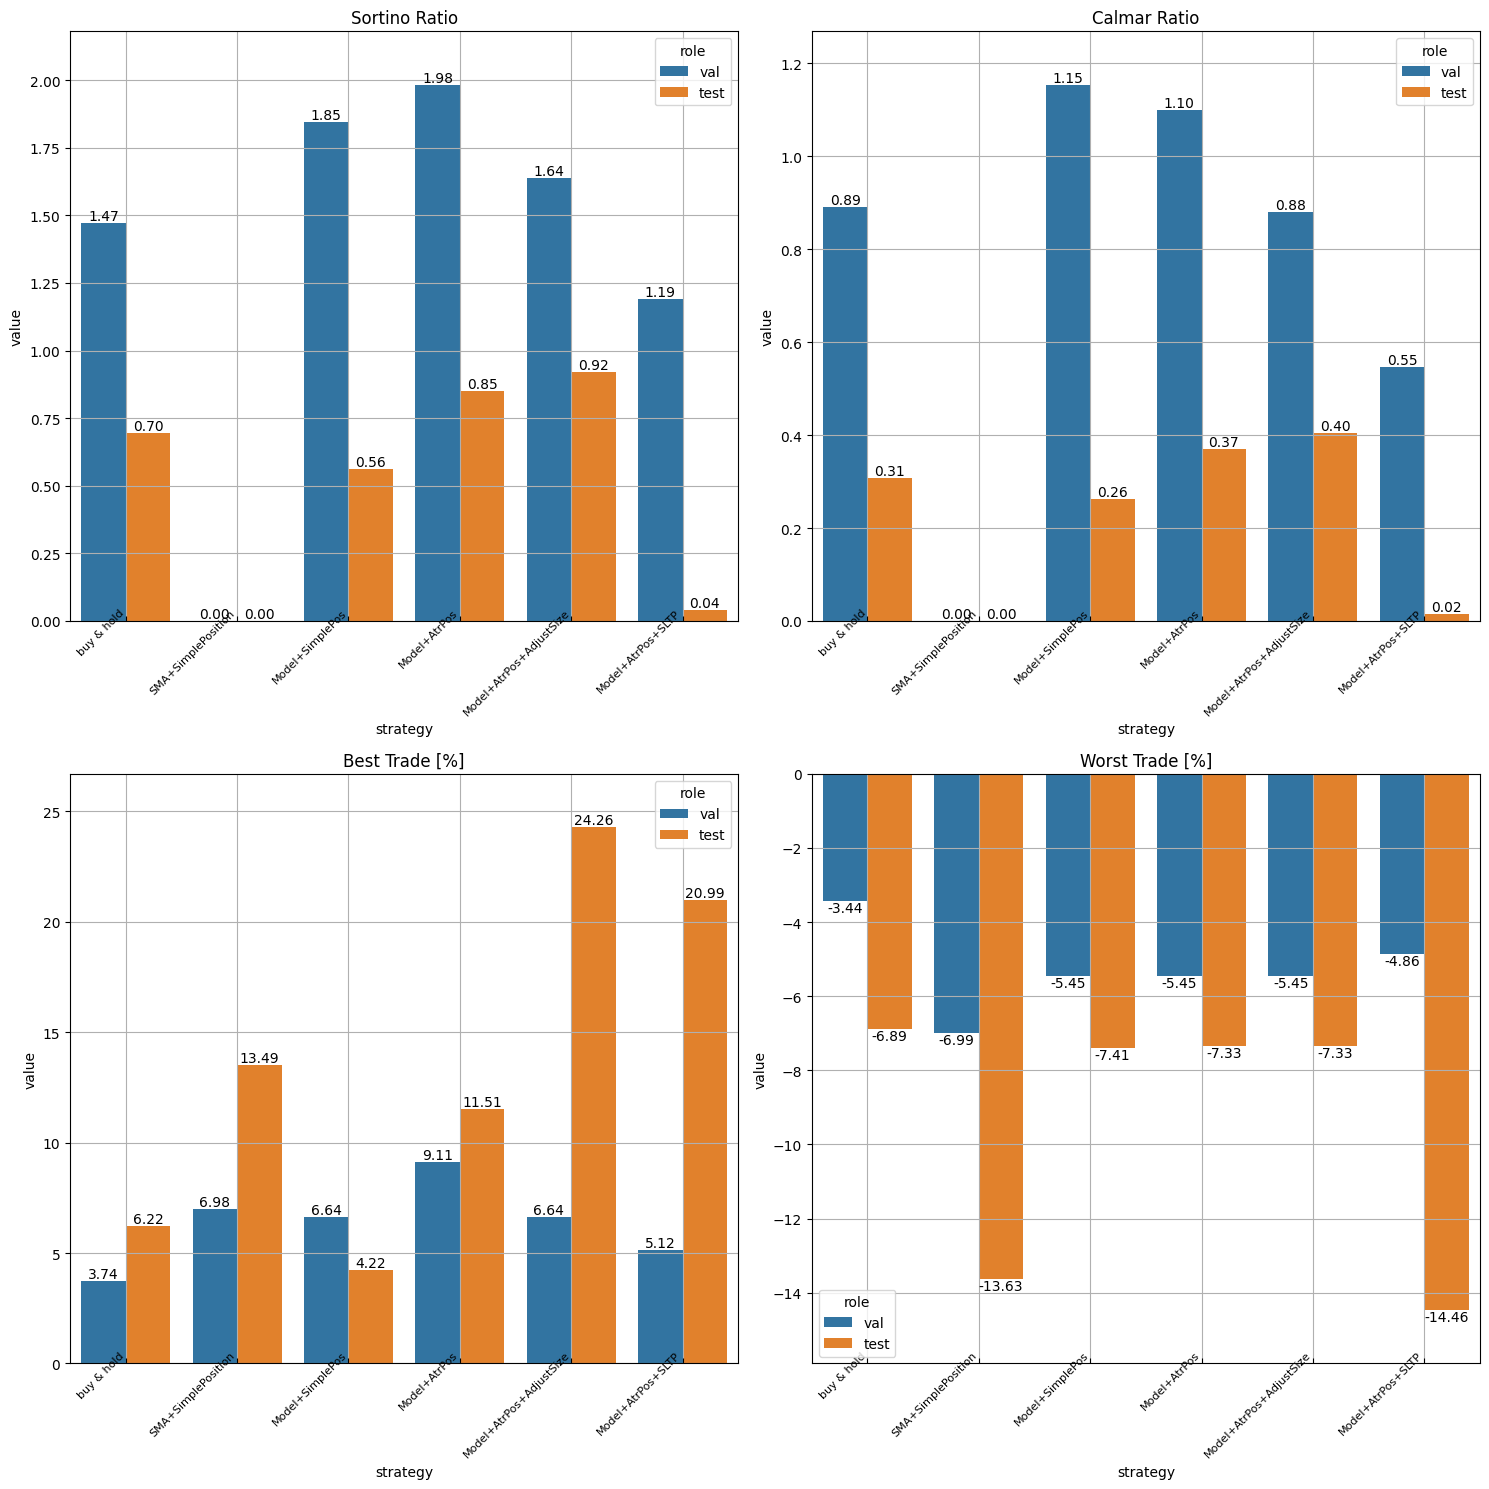

In [19]:
job_batch_backtests.compare_strategies()